In [1]:
from gammapy.datasets import MapDataset, Datasets
from gammapy.maps import Map, WcsGeom, MapAxis
import astropy.units as u
from astropy.coordinates import SkyCoord

In [6]:
dataset1 = MapDataset.read('/Users/asinha/Work/LMC/analysis/hap_hd_impact/datasets/obs-23716.fits')
dataset2 = MapDataset.read('/Users/asinha/Work/LMC/analysis/hap_hd_impact/datasets/obs-23718.fits')
datasets = Datasets([dataset1, dataset2])

In [7]:
center=SkyCoord.from_name('SN 1987A')
energy_axis = MapAxis.from_energy_bounds(0.5, 20.0, 10, per_decade=False, unit="TeV")
energy_axis_true = MapAxis.from_energy_bounds(0.3*u.TeV, 50*u.TeV, 20,  name='energy_true')
geom = WcsGeom.create(
    skydir=center,
    binsz=0.02,
    width=12.0,
    frame="icrs",
    proj="CAR",
    axes=[energy_axis],
)

In [8]:
stacked = MapDataset.create(
    geom=geom, energy_axis_true=energy_axis_true, name="stacked"
)
stacked1 = MapDataset.create(
    geom=geom, energy_axis_true=energy_axis_true, name="stacked1"
)

for ds in datasets:
    ds1 = ds.cutout(ds._geom.center_skydir, 4.0*u.deg)
    stacked.stack(ds)
    stacked1.stack(ds1)

(<Figure size 432x288 with 2 Axes>,
 <WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>,
 <matplotlib.colorbar.Colorbar at 0x1574b8f28>)

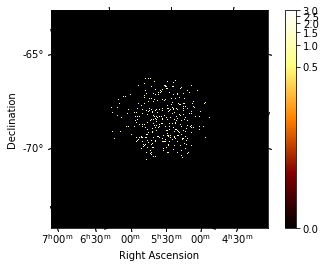

In [9]:
stacked.counts.sum_over_axes().plot(stretch='log', add_cbar=True)

(<Figure size 432x288 with 2 Axes>,
 <WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>,
 <matplotlib.colorbar.Colorbar at 0x1573ea128>)

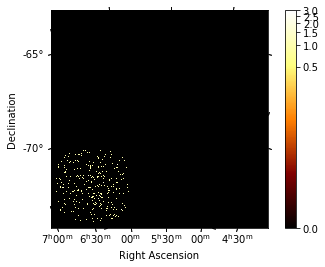

In [10]:
stacked1.counts.sum_over_axes().plot(stretch='log', add_cbar=True)

(<Figure size 432x288 with 1 Axes>,
 <WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>,
 None)

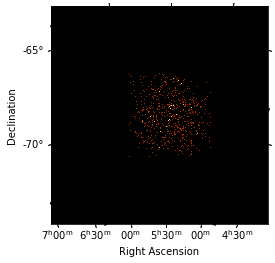

In [11]:
counts = Map.from_geom(geom)
counts.stack(dataset1.counts)
counts.sum_over_axes().plot()

(<Figure size 432x288 with 1 Axes>,
 <WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>,
 None)

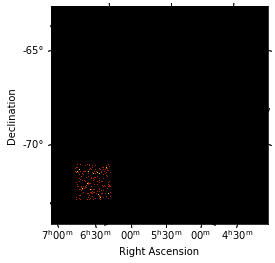

In [12]:
counts = Map.from_geom(geom)
cutout = dataset1.counts.cutout(dataset1.counts._geom.center_skydir, width=2.0*u.deg)
counts.stack(cutout)
counts.sum_over_axes().plot()